In [12]:
import csv
import cv2
import numpy as np

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
    
images = []
measurements = []
for line in lines:
    source_path = line[0]
    image = cv2.imread(source_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

X_train = np.array(images)
y_train = np.array(measurements)

(158, 160, 320, 3)


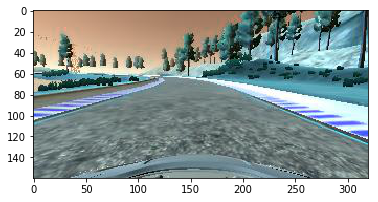

In [13]:
import matplotlib.pyplot as plt
print(X_train.shape)

%matplotlib inline
plt.imshow(X_train[0])

In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(160,320,3)))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam')
model.fit(X_train,y_train,validation_split = 0.2,shuffle = True, nb_epoch = 2)

model.save('model.h5')

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
C:\Users\chassein\Anaconda3\envs\sdcnd\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 126 samples, validate on 32 samples
Epoch 1/2
126/126 [==============================] - 90s - loss: 147570182.6627 - val_loss: 297777632.0000
Epoch 2/2
126/126 [==============================] - 90s - loss: 129961040.4444 - val_loss: 63718436.0000
